In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import  cross_validate
from sklearn.model_selection import train_test_split, cross_val_score, ShuffleSplit

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt

## Read CSV

In [2]:
convert = pd.read_csv('convertcsv.csv', sep = ',', encoding = 'utf-8')
convert.head()

,timestamp,frc,currentSpeed,freeFlowSpeed,currentTravelTime,freeFlowTravelTime,confidence,roadClosure
0,29/04/2021 17:52,FRC2,38,49,91,70,1.0,False
1,29/04/2021 17:59,FRC2,32,48,108,72,1.0,False
2,29/04/2021 18:00,FRC2,31,48,111,72,1.0,False
3,29/04/2021 18:01,FRC2,30,49,115,70,1.0,False
4,29/04/2021 18:02,FRC2,31,48,111,72,1.0,False


## Fix timestamp

In [3]:
convert['timestamp'] = convert['timestamp'].apply(lambda x: x[:-3])
convert['timestamp'] = pd.to_datetime(convert['timestamp'])

In [4]:
convert.head()

,timestamp,frc,currentSpeed,freeFlowSpeed,currentTravelTime,freeFlowTravelTime,confidence,roadClosure
0,2021-04-29 17:00:00,FRC2,38,49,91,70,1.0,False
1,2021-04-29 17:00:00,FRC2,32,48,108,72,1.0,False
2,2021-04-29 18:00:00,FRC2,31,48,111,72,1.0,False
3,2021-04-29 18:00:00,FRC2,30,49,115,70,1.0,False
4,2021-04-29 18:00:00,FRC2,31,48,111,72,1.0,False


In [5]:
convert.describe()

,currentSpeed,freeFlowSpeed,currentTravelTime,freeFlowTravelTime,confidence
count,2714.000000,2714.000000,2714.000000,2714.000000,2714.000000
mean,45.346721,48.500368,78.165807,71.000737,0.899289
std,6.466584,0.503032,15.883786,1.002393,0.171305
min,21.000000,48.000000,70.000000,69.000000,0.520000
25%,48.000000,48.000000,70.000000,70.000000,0.940000
50%,48.000000,48.000000,72.000000,72.000000,0.990000
75%,49.000000,49.000000,72.000000,72.000000,1.000000
max,49.000000,50.000000,164.000000,72.000000,1.000000


In [6]:
convert = convert.groupby('timestamp').mean()

In [7]:
convert.head()

,currentSpeed,freeFlowSpeed,currentTravelTime,freeFlowTravelTime,confidence,roadClosure
timestamp,,,,,,
2021-01-05 09:00:00,49.00,49.00,70.00,70.0,0.980,False
2021-01-05 10:00:00,47.95,49.00,71.95,70.0,0.981,False
2021-01-05 11:00:00,47.55,48.65,72.85,70.7,0.998,False
2021-01-05 12:00:00,48.90,48.90,70.20,70.2,1.000,False
2021-01-05 13:00:00,48.00,48.00,72.00,72.0,1.000,False


In [8]:
convert = convert.drop(columns = ['roadClosure'])

## Visualize Data 

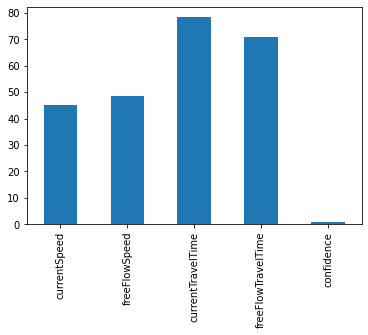

In [9]:
df = convert.mean().plot(kind='bar')

## Normalize data

In [10]:
scaler_freeFlow = MinMaxScaler()
scaler_currentTravelTime = MinMaxScaler()
scaler_freeFlowTravel = MinMaxScaler()
scaler_currentSpeed = MinMaxScaler()


convert[['freeFlowSpeed']] =  scaler_freeFlow.fit_transform(convert[['freeFlowSpeed']])
convert[['currentTravelTime']] =  scaler_currentTravelTime.fit_transform(convert[['currentTravelTime']])
convert[['freeFlowTravelTime']] =  scaler_freeFlowTravel.fit_transform(convert[['freeFlowTravelTime']])
convert[['currentSpeed']] =  scaler_currentSpeed.fit_transform(convert[['currentSpeed']])


In [11]:
convert.head()

,currentSpeed,freeFlowSpeed,currentTravelTime,freeFlowTravelTime,confidence
timestamp,,,,,
2021-01-05 09:00:00,1.000000,1.00,0.000000,0.00,0.980
2021-01-05 10:00:00,0.951222,1.00,0.032500,0.00,0.981
2021-01-05 11:00:00,0.932641,0.65,0.047500,0.35,0.998
2021-01-05 12:00:00,0.995355,0.90,0.003333,0.10,1.000
2021-01-05 13:00:00,0.953545,0.00,0.033333,1.00,1.000


In [12]:
y = convert['currentSpeed']
x = convert.drop(columns = ['currentSpeed'])

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.3, random_state = 40)

train_x

,freeFlowSpeed,currentTravelTime,freeFlowTravelTime,confidence
timestamp,,,,
2021-02-05 01:00:00,0.50,0.049167,0.50,0.8000
2021-04-30 10:00:00,0.35,0.084167,0.65,0.9960
2021-04-30 04:00:00,0.00,0.033333,1.00,0.5400
2021-01-05 13:00:00,0.00,0.033333,1.00,1.0000
2021-06-05 13:00:00,0.05,0.121667,0.95,1.0000
...,...,...,...,...
2021-04-05 09:00:00,0.60,0.052500,0.40,0.9945
2021-01-05 21:00:00,0.90,0.060000,0.10,0.9970
2021-03-05 12:00:00,0.20,0.095833,0.80,1.0000


In [13]:
convert.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 140 entries, 2021-01-05 09:00:00 to 2021-09-05 10:00:00
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   currentSpeed        140 non-null    float64
 1   freeFlowSpeed       140 non-null    float64
 2   currentTravelTime   140 non-null    float64
 3   freeFlowTravelTime  140 non-null    float64
 4   confidence          140 non-null    float64
dtypes: float64(5)
memory usage: 6.6 KB


## Decision Tree

In [14]:
model_regression = DecisionTreeRegressor()

model_regression.fit(train_x, train_y)
predictions = model_regression.predict(test_x)
print(predictions)

score = model_regression.score(test_x, test_y)

[0.91405868 0.34963325 0.78863081 0.79792176 0.16845966 0.96748166
 0.84669927 0.78630807 0.95354523 1.         0.65525672 0.95122249
 0.88618582 1.         0.6794621  0.65391198 0.37518337 0.6794621
 0.99303178 0.86760391 0.95354523 0.62603912 0.95354523 0.79792176
 0.94621027 0.93031785 0.79792176 1.         0.2799511  0.77701711
 0.37518337 1.         0.849022   0.97444988 0.18471883 0.94889976
 0.78863081 1.         1.         0.77701711 0.35195599 0.78863081]


In [15]:
scores = cross_val_score(model_regression, x, y, cv=20)

print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.97 accuracy with a standard deviation of 0.03


## Other

In [16]:
model_regression_2 = DecisionTreeRegressor()

model_regression_2.fit(train_x, train_y)
predictions_2 = model_regression_2.predict(test_x)
#print(predictions_2)

print('MSE: ', np.sqrt(mean_squared_error(test_y,predictions_2))) 
print('Score: ', r2_score(test_y,predictions_2))

MSE:  0.05679976522547271
Score:  0.9420095886687381


In [17]:
[test_y] = scaler_currentSpeed.inverse_transform([test_y])
[train_y] = scaler_currentSpeed.inverse_transform([train_y])
[predictions_2] = scaler_currentSpeed.inverse_transform([predictions_2])

## Predictions

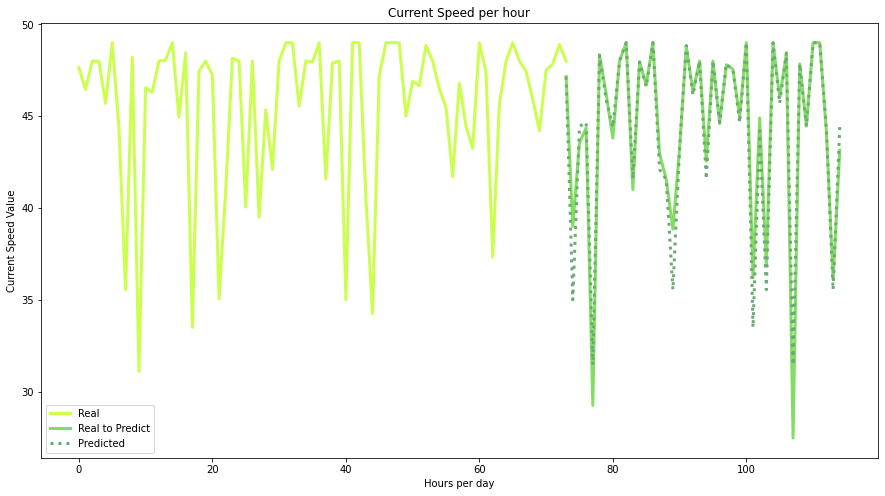

In [18]:
plt.figure(figsize = (15, 8))
plt.plot(range(len(train_y[:-24])), train_y[:-24], label = 'Real', color = '#CBFF4D', 
             linewidth = 3)
plt.plot(range(len(train_y[:-24]) - 1, len(train_y [:-24]) + len(test_y) - 1), test_y, label = 'Real to Predict', 
             color = '#84DD63', linewidth = 3)
plt.plot(range(len(train_y[:-24]) - 1, len(train_y [:-24]) + len(test_y) - 1), predictions_2, label = 'Predicted', 
              color = '#6BAA75', linestyle= 'dotted',linewidth = 3)
plt.title('Current Speed per hour')
plt.ylabel('Current Speed Value')
plt.xlabel('Hours per day')
plt.legend()
plt.show()